In [1]:
### Final_invoice file

* Imports

In [2]:
import numpy as np
import pandas as pd
import sys

In [3]:
import re

In [4]:
sys.path.append('/Users/Aniket/MyStuff/Study/GreyAtom/GeneralFunctions')

In [5]:
import Numerical_EDA as neda
import Categorical_EDA as ceda
import Data_Descriptions

In [6]:
data = pd.read_csv('data/Final_invoice.csv', low_memory=False)

In [7]:
ddes = Data_Descriptions.Data_Descriptions()
ddes.basic_descriptions(data)

Rows: 492314 Columns: 59
--------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492314 entries, 0 to 492313
Data columns (total 59 columns):
Unnamed: 0              492314 non-null int64
Amt Rcvd From Custom    295028 non-null float64
Amt Rcvd From Ins Co    295028 non-null float64
Area / Locality         468424 non-null object
CGST(14%)               295028 non-null float64
CGST(2.5%)              295028 non-null float64
CGST(6%)                295028 non-null float64
CGST(9%)                295028 non-null float64
CITY                    492313 non-null object
Cash /Cashless Type     27420 non-null object
Claim No.               4804 non-null object
Cust Type               492314 non-null object
Customer No.            492314 non-null object
District                492314 non-null object
Expiry Date             22231 non-null object
Gate Pass Date          40915 non-null object
Gate Pass Time          492314 non-null object
IGST(12%)               295028 non-null flo

                       Count
Amt Rcvd From Custom  197286
Amt Rcvd From Ins Co  197286
Area / Locality        23890
CGST(14%)             197286
CGST(2.5%)            197286
CGST(6%)              197286
CGST(9%)              197286
CITY                       1
Cash /Cashless Type   464894
Claim No.             487510
Expiry Date           470083
Gate Pass Date        451399
IGST(12%)             197286
IGST(18%)             197286
IGST(28%)             197286
IGST(5%)              197286
Insurance Company     468723
Model                   1525
ODN No.               197286
Outstanding Amt       197286
Policy no.            475432
Regn No                   16
SGST/UGST(14%)        197286
SGST/UGST(2.5%)       197286
SGST/UGST(6%)         197286
SGST/UGST(9%)         197286
Service Advisor Name  492314
TDS amount            197286
Technician Name       236834
Total CGST            197286
Total GST             197286
Total IGST            197286
Total SGST/UGST       197286
Total Value   

/Users/Aniket/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Number of Outliers:
Unnamed: 0                  0
Amt Rcvd From Custom        0
Amt Rcvd From Ins Co        0
CGST(14%)                   0
CGST(2.5%)                  0
CGST(6%)                    0
CGST(9%)                    0
IGST(12%)                   0
IGST(18%)                   0
IGST(28%)                   0
IGST(5%)                    0
Invoice No                  0
Job Card No                 0
KMs Reading             24189
Labour Total            45629
Misc Total              69608
ODN No.                 57890
OSL Total               67220
Outstanding Amt             0
Parts Total             51482
Pin code                 5097
Recovrbl Exp              482
SGST/UGST(14%)              0
SGST/UGST(2.5%)             0
SGST/UGST(6%)               0
SGST/UGST(9%)               0
Service Advisor Name        0
TDS amount                  0
Total Amt Wtd Tax.      47404
Total CGST                  0
Total GST                   0
Total IGST                  0
Total SGST/UGST     

In [8]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# store all col names
colums_all = data.columns

In [10]:
# numerical df and columns
data_num = data.select_dtypes(exclude='object')
colums_num = data_num.columns
colums_num

Index(['Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'CGST(14%)',
       'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)', 'IGST(12%)', 'IGST(18%)',
       'IGST(28%)', 'IGST(5%)', 'Invoice No', 'Job Card No', 'KMs Reading',
       'Labour Total', 'Misc Total', 'ODN No.', 'OSL Total', 'Outstanding Amt',
       'Parts Total', 'Pin code', 'Recovrbl Exp', 'SGST/UGST(14%)',
       'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount', 'Total Amt Wtd Tax.',
       'Total CGST', 'Total GST', 'Total IGST', 'Total SGST/UGST',
       'Total Value'],
      dtype='object')

In [11]:
# categorical df and columns
data_cat = data.select_dtypes(include='object')
colums_cat = data_cat.columns
colums_cat

Index(['Area / Locality', 'CITY', 'Cash /Cashless Type', 'Claim No.',
       'Cust Type', 'Customer No.', 'District', 'Expiry Date',
       'Gate Pass Date', 'Gate Pass Time', 'Insurance Company', 'Invoice Date',
       'Invoice Time', 'JobCard Date', 'JobCard Time', 'Make', 'Model',
       'Order Type', 'Plant', 'Plant Name1', 'Policy no.', 'Print Status',
       'Regn No', 'Technician Name', 'User ID'],
      dtype='object')

***

### Initial pre-processing

1. Numerical data

In [12]:
for col in ['Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'CGST(14%)',
       'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)', 'IGST(12%)', 'IGST(18%)',
       'IGST(28%)', 'IGST(5%)', 'SGST/UGST(14%)',
       'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount',
       'Total CGST', 'Total GST', 'Total IGST', 'Total SGST/UGST']:
    print(f'Value counts for {col}:')
    print(data[col].value_counts(dropna=False))
    print('---\n')

Value counts for Amt Rcvd From Custom:
0.0    295028
NaN    197286
Name: Amt Rcvd From Custom, dtype: int64
---

Value counts for Amt Rcvd From Ins Co:
0.0    295028
NaN    197286
Name: Amt Rcvd From Ins Co, dtype: int64
---

Value counts for CGST(14%):
0.0    295028
NaN    197286
Name: CGST(14%), dtype: int64
---

Value counts for CGST(2.5%):
0.0    295028
NaN    197286
Name: CGST(2.5%), dtype: int64
---

Value counts for CGST(6%):
0.0    295028
NaN    197286
Name: CGST(6%), dtype: int64
---

Value counts for CGST(9%):
0.0    295028
NaN    197286
Name: CGST(9%), dtype: int64
---

Value counts for IGST(12%):
0.0    295028
NaN    197286
Name: IGST(12%), dtype: int64
---

Value counts for IGST(18%):
0.0    295028
NaN    197286
Name: IGST(18%), dtype: int64
---

Value counts for IGST(28%):
0.0    295028
NaN    197286
Name: IGST(28%), dtype: int64
---

Value counts for IGST(5%):
0.0    295028
NaN    197286
Name: IGST(5%), dtype: int64
---

Value counts for SGST/UGST(14%):
0.0    295028
NaN

In [13]:
# store columns with zero values
colums_zeros = ['Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'CGST(14%)',
       'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)', 'IGST(12%)', 'IGST(18%)',
       'IGST(28%)', 'IGST(5%)', 'SGST/UGST(14%)',
       'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount',
       'Total CGST', 'Total GST', 'Total IGST', 'Total SGST/UGST']

In [14]:
columns_leg = []
for col in colums_num:
    if col not in colums_zeros:
        columns_leg.append(col)
#         print(f'Value counts for {col}:')
#         print(data[col].value_counts(dropna=False))
#         print('---\n')
columns_leg

['Invoice No',
 'Job Card No',
 'KMs Reading',
 'Labour Total',
 'Misc Total',
 'ODN No.',
 'OSL Total',
 'Outstanding Amt',
 'Parts Total',
 'Pin code',
 'Recovrbl Exp',
 'Total Amt Wtd Tax.',
 'Total Value']

In [15]:
columns_leg.remove('Invoice No')
columns_leg.remove('Job Card No')
columns_leg.remove('Pin code')
columns_leg.remove('ODN No.')

columns_leg

['KMs Reading',
 'Labour Total',
 'Misc Total',
 'OSL Total',
 'Outstanding Amt',
 'Parts Total',
 'Recovrbl Exp',
 'Total Amt Wtd Tax.',
 'Total Value']

In [16]:
data[columns_leg].fillna(0)

,KMs Reading,Labour Total,Misc Total,OSL Total,Outstanding Amt,Parts Total,Recovrbl Exp,Total Amt Wtd Tax.,Total Value
0,49317,1203.14,0.00,500.06,0.0,2348.75,0.0,4051.95,4051.95
1,78584,804.26,197.03,0.00,0.0,0.00,0.0,1001.29,1001.29
2,33985,180.19,0.00,0.00,0.0,52.95,0.0,233.14,233.14
3,78584,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
4,50057,1202.97,100.00,499.99,0.0,944.16,0.0,2747.12,2747.12
5,13122,0.00,0.00,851.70,0.0,14.22,0.0,865.92,865.92
6,26964,0.00,0.00,749.42,0.0,0.00,0.0,749.42,749.42
7,12943,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
8,18563,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
9,5443,698.92,49.99,499.95,0.0,2663.75,0.0,3912.61,3912.61


KMs Reading :


<Figure size 720x360 with 0 Axes>

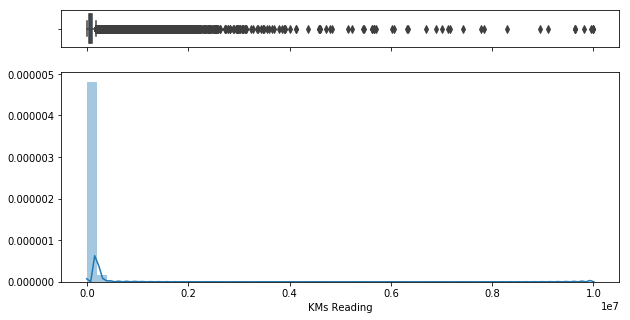

Mean: 77577.03
Median: 60078.5
Q1: 34096.25
Q2: 93769.0
Min: 0
Max: 9999999
Kurtosis Score: 1525.773376337985
Shapiro Test Score (test statistic, p-value): (0.32753145694732666, 0.0)
P-value for the shapiro test is less than 5%:True


Labour Total :


/Users/Aniket/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 720x360 with 0 Axes>

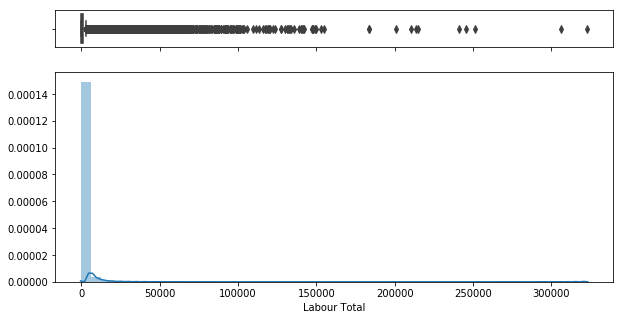

Mean: 1353.65
Median: 537.99
Q1: 0.85
Q2: 1274.9975
Min: -137.0
Max: 323000.0
Kurtosis Score: 637.9088842297228
Shapiro Test Score (test statistic, p-value): (0.30177146196365356, 0.0)
P-value for the shapiro test is less than 5%:True


Misc Total :


<Figure size 720x360 with 0 Axes>

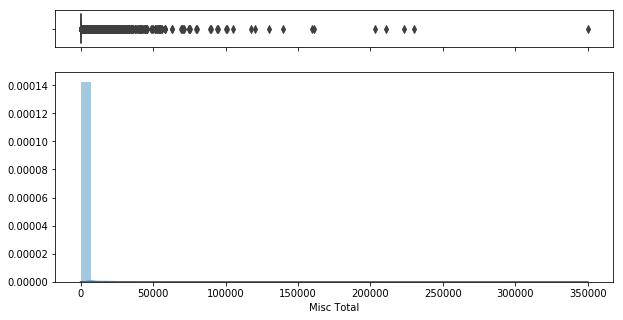

Mean: 138.66
Median: 0.0
Q1: 0.0
Q2: 49.75
Min: -0.01
Max: 350000.0
Kurtosis Score: 13310.836121035776
Shapiro Test Score (test statistic, p-value): (0.05424010753631592, 0.0)
P-value for the shapiro test is less than 5%:True


OSL Total :


<Figure size 720x360 with 0 Axes>

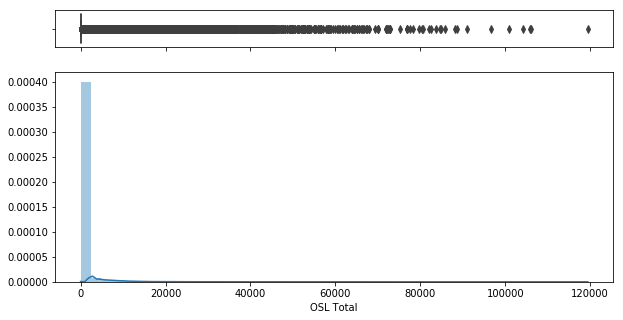

Mean: 466.07
Median: 0.0
Q1: 0.0
Q2: 0.0
Min: 0.0
Max: 119444.19
Kurtosis Score: 235.8529515142437
Shapiro Test Score (test statistic, p-value): (0.18041574954986572, 0.0)
P-value for the shapiro test is less than 5%:True


Outstanding Amt :


/Users/Aniket/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Aniket/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 720x360 with 0 Axes>

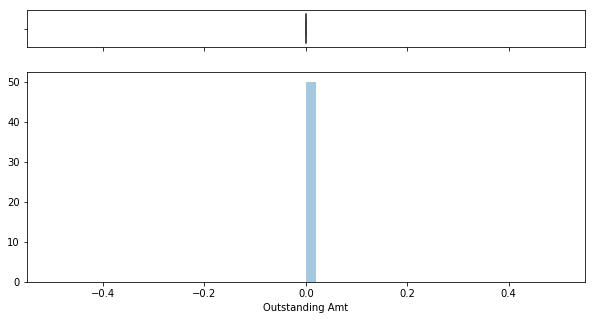

Mean: 0.0
Median: 0.0
Q1: 0.0
Q2: 0.0
Min: 0.0
Max: 0.0
Kurtosis Score: 0
Shapiro Test Score (test statistic, p-value): (1.0, 1.0)
P-value for the shapiro test is less than 5%:False


Parts Total :


/Users/Aniket/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1657: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


<Figure size 720x360 with 0 Axes>

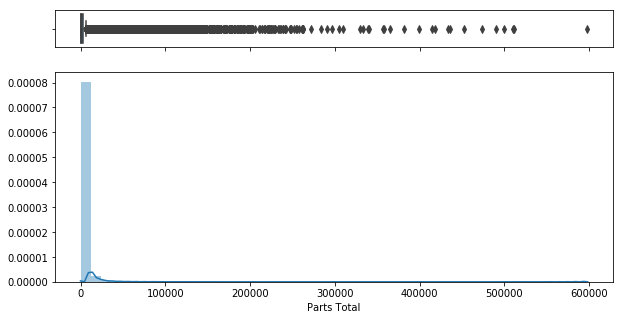

Mean: 2436.61
Median: 244.56
Q1: 0.0
Q2: 2250.0475
Min: -0.01
Max: 598003.48
Kurtosis Score: 583.9340759552379
Shapiro Test Score (test statistic, p-value): (0.2713274359703064, 0.0)
P-value for the shapiro test is less than 5%:True


Recovrbl Exp :


<Figure size 720x360 with 0 Axes>

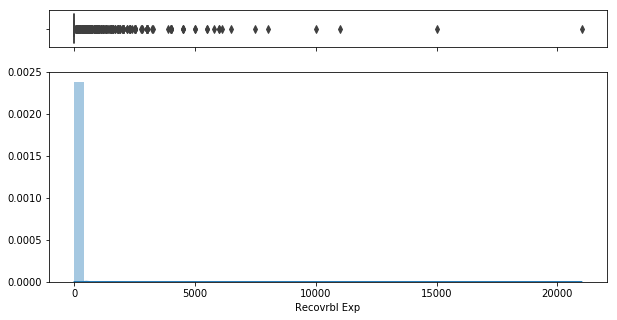

Mean: 1.17
Median: 0.0
Q1: 0.0
Q2: 0.0
Min: 0.0
Max: 21000.26
Kurtosis Score: 33067.144796116765
Shapiro Test Score (test statistic, p-value): (0.004432618618011475, 0.0)
P-value for the shapiro test is less than 5%:True


Total Amt Wtd Tax. :


<Figure size 720x360 with 0 Axes>

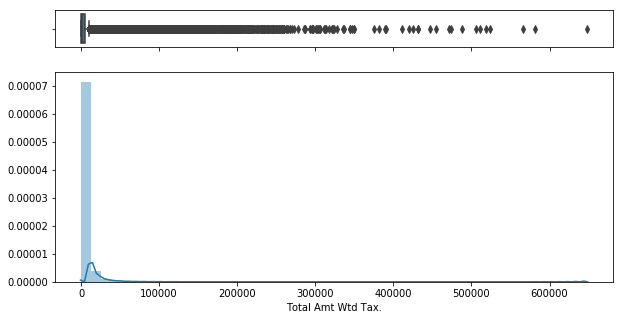

Mean: 4394.98
Median: 1452.82
Q1: 299.04
Q2: 4409.9175000000005
Min: -137.0
Max: 648203.49
Kurtosis Score: 289.80157445612963
Shapiro Test Score (test statistic, p-value): (0.34663575887680054, 0.0)
P-value for the shapiro test is less than 5%:True


Total Value :


<Figure size 720x360 with 0 Axes>

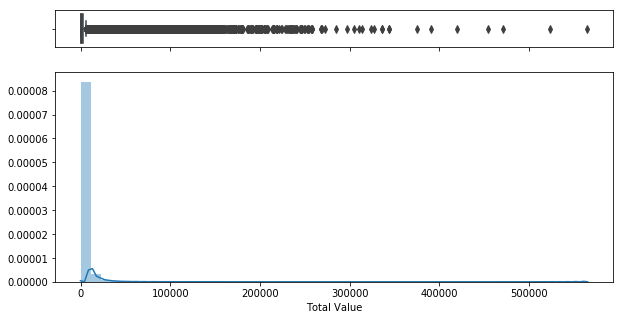

Mean: 2647.64
Median: 199.14
Q1: 0.0
Q2: 2401.9
Min: 0.0
Max: 565487.2
Kurtosis Score: 365.2394571248451
Shapiro Test Score (test statistic, p-value): (0.30116504430770874, 0.0)
P-value for the shapiro test is less than 5%:True




In [17]:
neda.univariate_numeric(data[columns_leg].fillna(0),len(columns_leg))

In [18]:
colums_zeros.append('Outstanding Amt')

2. Categorical data

In [19]:
colums_cat

Index(['Area / Locality', 'CITY', 'Cash /Cashless Type', 'Claim No.',
       'Cust Type', 'Customer No.', 'District', 'Expiry Date',
       'Gate Pass Date', 'Gate Pass Time', 'Insurance Company', 'Invoice Date',
       'Invoice Time', 'JobCard Date', 'JobCard Time', 'Make', 'Model',
       'Order Type', 'Plant', 'Plant Name1', 'Policy no.', 'Print Status',
       'Regn No', 'Technician Name', 'User ID'],
      dtype='object')

In [20]:
data_cat['Cash /Cashless Type'].value_counts(dropna=False)

NaN         464894
CASH         22193
CASHLESS      5011
Z              216
Name: Cash /Cashless Type, dtype: int64

In [21]:
# data_cat['CITY'].value_counts(dropna=False)[:100]

In [22]:
data_cat['CITY'].map(lambda x: str(x).lower()).value_counts(dropna=False)[:100]

chennai         33922
pune            25863
hyderabad       20392
nashik          16827
nagpur          15078
bangalore       13664
nasik           12252
surat           10970
coimbatore      10149
thane            8365
vapi             7258
nellore          6035
noida            6008
faridabad        5438
ludhiana         5432
mangalore        5343
bengaluru        4649
mohali           4648
moga             4233
mumbai           4224
navi mumbai      3810
neyveli          3707
delhi            3594
bhopal           3167
madurai          3129
thanjavur        3128
cbe              3125
chidambaram      3036
panchkula        2968
aurangabad       2896
                ...  
kolar            1220
gaziabad         1165
puducherry       1161
una              1131
jodhpur          1080
shirur           1069
pcmc             1065
grater noida     1054
gr noida         1040
bikaner          1036
villupuram       1015
anantapur         988
zirakpur          988
new delhi         976
patna     

In [23]:
data['CITY'] = data['CITY'].map(lambda x: str(x).lower())

In [29]:
data_cat['CITY'] = data_cat['CITY'].map(lambda x: str(x).lower())

/Users/Aniket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
city_list = [str(x) for x in data_cat['CITY'].unique()]

In [31]:
thane_list = []
for l in city_list:
# for l in ['thane', 'thane w', 'thnae', 'pune']:
    temp = re.findall('thane|thnae',str(l),flags=re.I)
#     print(temp)
    if len(temp)!=0:
        thane_list.append(l)
        print(l)

thane
thnae
thane[w]
thane[e]
thane-w
thane (w)
thane west
kalwa naka thane
kolshet, thane
thane [ w]
opp.vasantvihar school thane [w]
manpada, thane
mira road thane
jambali naka, thane
thane (west)
manpada,thane-w
thane ( w)
thane [w]
thane w
thane [ w ]
thane(w)
kalwa thane
thane (w.)
g.b.road,thane-w
estate,thane-w
tennhath naka thane
thane (w),
nilkant height thane
thane[w[
thane`
pawar nagar, thane
waghbill, thane (west)
thane[w[]
hotel samudra,thane-w
thane w]
thane -w
thnaer
g.b.road, thane
thane  w
g. b. rd., thane w
panchpakhadi , thane
kopari ,thane (e)
wagle estate estate ,thane
pawar nagar, thane west
patlipada thane[w]
thane[w\]
magthane village, borivali (east) m
kopri  thane
patli pada thane[w]
kopari, thane (east)
thane-e
dist.thane
g.b. rd thane
kharegaon kalwa thane
dhokali thane
thane [w ]
thane-west
lokmanya nagar,thane-w
khopat thane
thane ( w )
g. b. road ,thane,
thane east
court naka, thane
thane  (w)
gb road thane
dhokali thane w
vasant vihar thane
dist thane
mu

In [32]:
thane_list.remove('thanesar')
thane_list.remove('thathaneri')
thane_list.remove('magthane village, borivali (east) m')
# thane_list

In [56]:
# data[data.CITY == 'manpada,thane-w']

In [34]:
data_cat['District'].value_counts(dropna=False, normalize=True)*100

Maharashtra             26.023838
Tamil Nadu              23.624963
Karnataka                8.964807
Andhra Pradesh           8.247582
Uttar Pradesh            6.405262
Gujarat                  4.956796
Punjab                   4.619206
Haryana                  3.650313
Madhya Pradesh           2.762058
Rajasthan                2.735246
Telangana                1.572370
Kerala                   1.219141
Delhi                    1.099705
Chandigarh               0.674163
Himachal Pradesh         0.673554
Bihar                    0.661773
Uttarakhand              0.516134
Odisha                   0.468197
Puducherry               0.348558
West Bengal              0.270559
Dadra and Nagar Hav.     0.184232
Chhattisgarh             0.126342
Daman and Diu            0.088561
Jharkhand                0.051999
Assam                    0.020312
Arunachal Pradesh        0.012594
Goa                      0.004875
Nagaland                 0.004875
Jammu and Kashmir        0.004266
Andaman and Ni

In [35]:
top_15_states = data_cat['District'].value_counts(dropna=False, normalize=True)[:15].index

In [36]:
# Cut at 2%?

In [37]:
data.shape[0]-data_cat['Customer No.'].nunique() 

238830

In [38]:
# repeating customers

In [39]:
data['Order Type'].value_counts()

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
Workshop Damage          17
WBW Order                17
Name: Order Type, dtype: int64

In [40]:
data['Cust Type'].value_counts(normalize=True)*100

Retail              99.325837
Fleets               0.450525
Corporate others     0.117608
Corporate- M&M       0.051593
MFCWL                0.051187
Franchise            0.003047
Insurance            0.000203
Name: Cust Type, dtype: float64

In [41]:
data['Make'].value_counts()

MARUTI SUZUKI           147102
MAHINDRA &  MAHINDRA     87356
HYUNDAI                  85342
TATA MOTORS              58034
GENERAL MOTORS           29092
FORD                     21616
TOYOTA                   19466
HONDA                    15464
SKODA                     6515
FIAT                      6437
VOLKSWAGEN                6150
RENAULT                   3429
NISSAN                    3090
MITSUBISHI MOTORS         1427
DAEWOO                     392
BMW                        257
MERCEDES BENZ              256
AUDI                       220
HINDUSTAN MOTORS           219
FORCE                      207
PREMIER AUTOMOBILES         93
SONALIKA                    87
LAND ROVER                  21
VOLVO                       19
SAN MOTORS                   8
JEEP                         7
PORCHE                       6
MORRIS                       2
Name: Make, dtype: int64

In [42]:
data['Model'].value_counts()

SWIFT                     31899
ALTO                      28569
SANTRO                    24536
SCORPIO CRDE              23771
WAGONR                    22864
I10                       21892
INDICA                    19810
SWIFT DZIRE               16004
BOLERO                    15909
XYLO                      13346
I20                       12896
INNOVA                    11470
CITY                      10665
VISTA                     10341
INDIGO                    10337
800                       10185
VERNA                      8564
FIGO                       7709
FIESTA                     7667
LOGAN D                    7353
SPARK                      7270
RITZ                       7075
BEAT                       6881
OMNI                       6415
ACCENT                     5734
VERITO                     5573
ZEN                        5137
LOGAN P                    5063
INDIGO MANZA               4990
XUV 500                    4748
                          ...  
AMEO    

In [43]:
data['Print Status'].value_counts(normalize=True)*100

NO     91.689247
YES     8.310753
Name: Print Status, dtype: float64

In [44]:
for c in data['Plant Name1'].unique():
    print(c)


THANE
PUNE
NASHIK
MADEENAGUDA
GUINDY
NERKUNDRAM
VAPI
HYDERABAD L B NAGAR
SURAT UDHANA
BELLANDUR - BANGALORE
AMBATTUR - CHENNAI
NELLORE
COIMBATORE
HADAPSAR - PUNE
MOHAN NAGAR - GAZIABAD
EDAPPALLY - KOCHI
GREATER NOIDA
FARIDABAD 1
HINJAWADI – PUNE
NERUL - NAVI MUMBAI
NAGPUR
GT ROAD - LUDHIANA
NOIDA - 63
NOIDA - 05
SAS NAGAR - MOHALI
YESHWANTPUR - BANGALORE
GILL ROAD - LUDHIANA
PANCHKULLA
PIMPRI - PUNE
X001 - AUTO PLANET WHEELS
X005 - KLN MOTORS
X006 - A.M.MOTORS
X008- AAKASH AUTO (Puducherry)
X010 - LVM MOTORS
X011- AAKASH AUTO (Villupuram)
X012 - SR CAR CARE
X013 - SAI AUTO WORKS
X014 - NANGAN MOTORS PVT LTD.
X017 - HEM KIRAN DIESELS
X020 - SURYABALA SERVICE
X021 - THE TRUE SAI MOTORSS
X022 - ARASU CAR ACCESSORIES
X024 - ARASU CAR ACC (TRICHY)
X025 - SHIVALIK AUTOMOBILES
X029 - SWAMI AUTO CARE PVT LTD
X034 - SOHAMM MOTORS
X036 - X-PRESS MOTORS
X037 - DHEERAJ MOTORS
X039 - SAI AUTOMOBILES
X041 - VARDAJYOTI AUTOMOBILES
X016 - KHUTWAD MOTORS
X018 - EXPRESS WHEELS AUTO SER
X026 - MAHADEVI S

In [45]:
# data[data['Plant']=='BC06']['Plant Name1']

In [48]:
def replace_thane(text):
    if text in thane_list:
        return 'thane'
    else:
        return text

In [49]:
data['CITY'] = data['CITY'].map(replace_thane)

In [50]:
data['CITY'].value_counts()

chennai                           33922
pune                              25863
hyderabad                         20392
nashik                            16827
nagpur                            15078
bangalore                         13664
nasik                             12252
thane                             11772
surat                             10970
coimbatore                        10149
vapi                               7258
nellore                            6035
noida                              6008
faridabad                          5438
ludhiana                           5432
mangalore                          5343
bengaluru                          4649
mohali                             4648
moga                               4233
mumbai                             4224
navi mumbai                        3810
neyveli                            3707
delhi                              3594
bhopal                             3167
madurai                            3129


In [52]:
for state in top_15_states:
    print('State - ',state)
    print(data[data['District']==state].groupby('CITY')['CITY'].count().sort_values(ascending=False)[:15])
    print('---')

State -  Maharashtra
CITY
pune           25768
nashik         16769
nagpur         15059
nasik          12227
thane          11743
mumbai          4208
navi mumbai     3806
aurangabad      2888
kolhapur        2461
solapur         2451
miraroad        1916
pcmc            1064
shirur          1059
a bad            771
kop              748
Name: CITY, dtype: int64
---
State -  Tamil Nadu
CITY
chennai        33763
coimbatore     10146
neyveli         3706
madurai         3128
thanjavur       3125
cbe             3122
chidambaram     3035
guindy          2792
salem           2643
tirupur         2495
tuticorin       2393
ambur           2230
trichy          2128
dharmapuri      2016
ranipet         1905
Name: CITY, dtype: int64
---
State -  Karnataka
CITY
bangalore                    13579
mangalore                     5338
bengaluru                     4637
mysore                        2656
shimoga                       1902
hassan                        1642
kolar                      

In [55]:
for state in top_15_states:
    print('State - ',state)
    print(data[data['District']==state].groupby(['CITY','Make'])['CITY'].count().sort_values(ascending=False)[:20])
    print('---')

State -  Maharashtra
CITY    Make                
pune    MARUTI SUZUKI           6892
nashik  MARUTI SUZUKI           6522
nagpur  MARUTI SUZUKI           5997
pune    MAHINDRA &  MAHINDRA    5708
        HYUNDAI                 5218
nasik   MARUTI SUZUKI           4343
thane   MARUTI SUZUKI           3753
nagpur  MAHINDRA &  MAHINDRA    3304
pune    TATA MOTORS             2802
nashik  HYUNDAI                 2675
nagpur  HYUNDAI                 2371
nasik   HYUNDAI                 2274
nashik  MAHINDRA &  MAHINDRA    2261
thane   HYUNDAI                 2230
nashik  TATA MOTORS             1925
Name: CITY, dtype: int64
---
State -  Tamil Nadu
CITY        Make                
chennai     MAHINDRA &  MAHINDRA    9181
            HYUNDAI                 6529
            MARUTI SUZUKI           6333
            TATA MOTORS             4636
coimbatore  HYUNDAI                 3111
            MARUTI SUZUKI           2396
guindy      MAHINDRA &  MAHINDRA    2385
chennai     FORD          

In [57]:
plant = pd.read_excel('data/Plant Master.xlsx')

In [79]:
plant_plants = plant.Plant.unique()
plant_plants

array(['BC07', 'BC30', 'X001', 'X002', 'X003', 'X005', 'X006', 'X007',
       'X008', 'X010', 'X011', 'X012', 'X013', 'X014', 'X016', 'X017',
       'X018', 'X020', 'X021', 'X022', 'X023', 'X024', 'X025', 'X026',
       'X027', 'X028', 'X029', 'X031', 'X032', 'X033', 'X034', 'X035',
       'X036', 'X037', 'X039', 'X041', 'X042', 'X044', 'X045', 'X046',
       'X047', 'X048', 'X049', 'X050', 'X051', 'X052', 'X053', 'X054',
       'X055', 'X056', 'X057', 'X058', 'X060', 'X061', 'X062', 'X063',
       'X064', 'X065', 'X066', 'X068', 'X072', 'X073', 'X074', 'X075',
       'X076', 'X079', 'X080', 'X081', 'X082', 'X083', 'X084', 'X085',
       'X086', 'X089', 'X091', 'X092', 'X095', 'X097', 'X098', 'X099',
       'X101', 'X102', 'X103', 'X105', 'X106', 'X107', 'X108', 'X109',
       'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X118', 'X119',
       'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128',
       'X129', 'X131', 'X132', 'X133', 'X135', 'X136', 'X138', 'X139',
      

In [76]:
data_plants = data.Plant.unique()
data_plants

array(['BC01', 'BC02', 'BC03', 'BC05', 'BC06', 'BC07', 'BC08', 'BC12',
       'BC13', 'BC15', 'BC16', 'BC17', 'BC18', 'BC19', 'BC20', 'BC21',
       'BC22', 'BC23', 'BC24', 'BC25', 'BC26', 'BC27', 'BC28', 'BC29',
       'BC30', 'BC31', 'BC32', 'BC33', 'BC34', 'X001', 'X005', 'X006',
       'X008', 'X010', 'X011', 'X012', 'X013', 'X014', 'X017', 'X020',
       'X021', 'X022', 'X024', 'X025', 'X029', 'X034', 'X036', 'X037',
       'X039', 'X041', 'X016', 'X018', 'X026', 'X028', 'X049', 'X007',
       'X027', 'X060', 'X023', 'X031', 'X032', 'X042', 'X045', 'X052',
       'X054', 'X061', 'X072', 'X033', 'X051', 'X085', 'X098', 'X055',
       'X058', 'X068', 'X074', 'X081', 'X048', 'X057', 'X082', 'X110',
       'X064', 'X075', 'X080', 'X035', 'X047', 'X062', 'X063', 'X092',
       'X109', 'X056', 'X102', 'X103', 'X124', 'X003', 'X044', 'X066',
       'X079', 'X101', 'X114', 'X126', 'X127', 'X128', 'X174', 'X175',
       'BC04', 'BC11', 'X046', 'X238', 'X125', 'X136', 'X091', 'X167',
      

In [77]:
plants_not_both = []
for p in data_plants:
    if p not in plant_plants:
        plants_not_both.append(p)
len(plants_not_both)

29

In [78]:
plants_not_both

['BC01',
 'BC02',
 'BC03',
 'BC05',
 'BC06',
 'BC08',
 'BC12',
 'BC13',
 'BC15',
 'BC16',
 'BC17',
 'BC18',
 'BC19',
 'BC20',
 'BC21',
 'BC22',
 'BC23',
 'BC24',
 'BC25',
 'BC26',
 'BC27',
 'BC28',
 'BC29',
 'BC31',
 'BC32',
 'BC33',
 'BC34',
 'BC04',
 'BC11']

In [86]:
for p in plants_not_both:
    print('Plant ',p)
    print(data[data.Plant == p].CITY.unique())
    print('---\n')

Plant  BC01
['thane' 'pcmc' 'kharghar' 'mumbai' 'kalawa' 'goregaon [e]' 'chunabhatti'
 'mira road [e]' 'powai' 'mumabi' 'kalyan [w]' 'mubai' 'indore'
 'navimumbai' 'pune' 'navi mumbai' 'mulund-w' 'mulund-e' 'mahind'
 'ambadi road, vasai w' 'bhiwandi' 'new mumbai' 'mulund[w]' 'ghatkopar[w]'
 'airoli' 'vikroli[e]' 'thyane[w]' 'pokhran road no.1,' 'mulund'
 'lokmany nagar' 'w' 'panvel' 'near jupitor hospital' 'palghar'
 'new bumbai' 'vasai' 'ambernath[w]' 'bhandup[w]' 'tyhane[w]'
 'bramhand last depot' 'andheri[w]' 'thana' 'mumbra' 'panchkula'
 'banglow,mulund-w' 'mulund[e]' 'mum' 'dahisar [w]' 'kalwa' 'chembur[e]'
 'collede,mith bunder road,' 'sion[w]' 'tahne' 'malad[w]' 'borivali[w]'
 'mira road[e]' 'kanjurmarg' 'kavesar' 'kalyan[e]' 'nasik' 'kanjurmarg[e]'
 'ghatkopar' 'kandivali[e]' 'nashik' 'andheri' 'raigad' 'kanjurmarg[w]'
 's.v.road,naupada,' 'dombivali' 'dombivali a(e)' 'bandra' 'dadar'
 'manpada' 'bhayandar[e]' 'ghatkopar e' 'pokhran road no.2' 'dahisar [e]'
 'pokharan rd 2,' 'm

['vapi' 'sohna road sector 49, gurgaon' 'silvassa' 'nargol' 'gunjan'
 'pardi' 'kolak' 'surat' 'dungra' 'umargaon' 'vapio' 'daman' 'nani daman'
 '.' 'dabhel nani daman' 'valsad' 'gujarat' 'bhilad' 'navi mumbai'
 'khanvel' 'mumbai' 'dadra' 'vapiu' 'chikhali' 'udwada' 'pune' 'umargam'
 'vapi.' 'vdwada' 'damman' 'palghar' 'umbergaon' 'fansa umargaon'
 'silvasa' 'dadara' 'umaergaon' 'dharampur' 'capi' 'pardi valsad'
 'nani damman' 'vadodam' 'moti daman' 'umbergam' 'bharuch' 'r r dist'
 'nagpur' 'nani daman vapi' 'junnar' 'sarigam' 'silvass' 'kaprada'
 'selvassa' 'kerla' 'talwada' 'mohannagar' 'autl' 'atul' 'dahanu' 'urwada'
 'dhrampur' 'd&nh' 'amli' 'killa-pardi' 'vasda' 'ahmedabad' 'mohangam'
 'near gov hospital' 'hariya hospital road' 'udvada' 'amroli surat'
 'surendranagar' 'kachigam' 'umg' 'bhavnagar' 'karambeli' 'vasai'
 'bengaluru' 'slvassa' 'kalgam' 'khadki' '396195' 'hyderabad' 'navsari'
 'sanjan' 'bhilwara' 'jalgaon' 'motaponda' 'varachha' 'silassa' 'sayli'
 'billimora' 'thane' 'ch

['banglore' 'bengaluru' 'bangalore' 'varthur hobali, bangalore' 'thane'
 'old madras road,bangalore-560 038' 'banagalore' 'pune' 'bangal;ore'
 'benagluru' 'bengalueru' 'bangalkore' 'kuchin' 'bangaluru' 'bengalru'
 'nagpur' 'villupuram' 'halli(rms ecospace& iintel office)'
 'bangalore................' 'baengaluru' 'batterahalli' 'bengalur'
 'ambur' 'bangluru' 'chennai' 'bengaluryu' 'bangarpet kolar'
 'marathahalli' 'gurgoan' 'bellandur' 'baangalore' 'bnagalore'
 'hsr layout,bangalore' 'bemngalurur' 'una' 'gurgoun' 'hyderabad'
 'banglauru' 'bnegaluru' 'kolar' 'bangaore' 'bnahgalore' 'channaic'
 'benagaluru' 'gurgaon' 'berngaluru' 'bangalopre' 'bangluru nagara'
 'sarjapur' 'mysore' 'arumbakkam' 'faridabad' 'bannglore' '`banglore'
 'outer ring road' 'koramangala, bangalore'
 'no:1,iindcanal cross st,rajaji naga' 'new delhi' 'hyderbad'
 'babusapdya kalyana nagar' 'huskur post,anekal taluk'
 '6th main road,koramangala' 'bengalurur' ','
 '6th main,bank of baroda colony' 'tanvi residency,benna

['ghaziabad' 'gzb' 'delhi' 'p.p.g' 'gaziabad' 'hindon air force station'
 'sec 3 rajindar nagar' 'sahibabad' 'shalimar garden' 'hindon mohannagar'
 'indrapuram' 'shahibabad' 'dairy farm' 'crossing republic gzb'
 'plot no-6/170, sec-6' 'ghz' 'mohannagar' 'laxmi nahar'
 'gali no 19 new karada colony' 'lajpat nagar, sahibabad' 'shb'
 'tuglakabad ext' 'hindan, ghaziabad' 'mandawali' 'bhajanpura' 'shaibabad'
 'newdelhi' 'area' 'hindon' 'part-1' 'indirapuram' 'new delhi' 'noida'
 'lagpat nagar, shahibabad' 'air force station, hindan' 'gazibad'
 'noida near rahul dairy' 'vaisali' 'vasundra' 'sargam park ext-1'
 'main shyam park' 'vijay nagar' 'gurgaon' 'shahdra' 'shalimar extn-1'
 'near shakti nagar' 'grater noida' 'mohan nager' 'sbd' 'salimar garden'
 'mohan nagar' 'rajnagar ext.' 'kanpur' 'ghazibad' 'vasundhra'
 'mayur vihar' 'sec 2' 'parsunath, mohan nagar' 'lonirod' 'mehrauli'
 'shababad' 'ghzb' 'lajpat nagar' 'rajendar nagar' 'meerut road'
 'g.b nagar' 'parshunath paradise' 'loni road gh

['navi mubai' 'panvel' 'navi mumbai' 'kharghar' 'kharghar,panvel'
 'navimumbai' 'pune' 'mumbai' 'new panvel' 'rathod house,room no-73/002'
 'thane' 'line ali,panvel' 'panvel,' 'sec-19a,nerul,navi mumbai'
 'cbd belapur' 'tal-roha' 'navi mumabi' 'navii mumbai' 'raigad' 'nerul(e)'
 'uran rd ne mumbai' 'nerul(w),navi mumbai' 'vashi,navi mumbai'
 'bhayander' 'sagamner' 'signal,nerul,navi mumbai'
 'resi sec-16,pl no.1plam beach rd.' 'bhayander(e)' 'navi mmumbai'
 'dahisar [e]' 'cbd,belapur' 'tel-panvel' 'raod' 'nnavi mumbai'
 'cbd belapur,' 'thakurli(e),' 'khalapur' 'mahad' 'nerul (e)'
 '152,sec-22,turbhe,navi mumbai' 'sanpada,navi mumbai' 'tulsi apts'
 'branch mimson house-92,' 'chs sec-24,belapur' 'neew panvel' 'dahisar'
 'tal. khalapur' 'nai mumbai' 'chembur,' 'new mumbai'
 'r.no.103,sec-6a kamothe,panvel' 'nerul,navi mumbai' 'sec-16a,sanpada'
 'kharghar,' 'sec-21,nerul' 'sanapada' 'darshan,panvel' 'navi  mumbai'
 'khopoli' 'koperkhairane' 'school,sector-11,nerul(e)' 'bhiwandi'
 'school,s

['.' 'g.b nagar' 'close to gate no. 2, noida' 'noida' 'delhi'
 'near bal bharti public school' 'meruth' 'mayur vihar phase 3'
 'gaziababad' 'greaternoida' 'ghaziabad' 'noida sec-5' 'new ashok nagar'
 'colony' 'agra' 'vasundra enclave' 'opp. marigold school noida'
 'laxmi nagar delhi' 'sec-4,opp. ntpc' 'greator noida' 'greater noida' ','
 'lakshmi nagar' 'kotdwara' 'mayur vihar' 'appt delhi'
 'mayur vihar phase 1' 'rishi nagar' 'new delhi' 'indirapuram gzb'
 'shakarpur' 'moida' 'sec-50, near omax tower noida' 'ned delhi'
 'sec 12, noida' 'vivekananad nagar' 'panjab' 'vasundhra enclave 110096'
 'chandigarh' 'gaziabad' 'gurgaon' 'dayal pur'
 'motor mkt ngr sec-15 noida' 'dilsad garden' 'sahadra, new delhi'
 'rewari' 'new delhi,' 'delhi,' 'sec-12 noida' 'laxmi nagar'
 'sec-39, noida' 'gazipur village' 'gzd' 'sec-119, noida'
 'gautam budh nagar' 'vasundhra enclave' 'sec-119 noida' 'palam'
 'badarpur' 'sec-1 noida' '1st sec-34 noida.' 'ashok nagar' 'gb nagar'
 'noida, near spice mall' 'farid

['pimpri' 'pimple gurav' 'pcmc' 'chinchwad' 'thergaon' 'pune' 'rahatne'
 'ravet' 'pimprigaon' 'kheda' 'chikali' 'chikhali' 'pimple sudhagar'
 'moshi' 'bhosari' 'aundh' 'akurdi' 'borivali' 'mahindra royal,pimpri'
 'nigdi' 'tal - junnar' 'kalewadi pimpri' 'dehu' 'haveli' 'pradhikaran'
 'kalewadi' 'kalewadi pcmc' 'tal - ambegaon' 'lonavala' 'rahatni' 'chakan'
 'mumbai' 'bhopkel' 'cgaudhari park,' 'jadhavwadi chikhali' 'kharadi'
 'nasik' 'old sangvi' 'chinchwad pradhikaran' 'nigadi' 'vakad' 'rahatani'
 'dwarka' 'susgarshan nagar' 'opp.roplas co.pune' 'pimple saudagar'
 'chichwad' 'krishna nagar chikhali' 'dapodi' 'shirur' 'dange chowk'
 'pimpri-chinchwad' 'talegaon dabhade' 'pimple' 'satara' 'moshi,'
 'shanti nagar,' 'agmera pimpri' 'khed pune' 'bihar' 'haveli pune'
 'uddham nagar pimpri' 'sec. no.26 nigdi' 'dehu road' 'pimple nilakh'
 'dabhade' 'latur' 'ambegaon' 'kiwale' 'ajamera' 'manchar' 'dighi' 'maval'
 'white fieldes pune' 'bhandup village' 'dehuroad' 'mali nagar pcmc'
 'pimpri gaon

In [87]:
plant.Plant.nunique()

438

In [93]:
# data['Job Card No']

In [94]:
for p in plants_not_both:
    print('Plant ',p)
    print(data[data.Plant == p]['Plant Name1'].unique())
    print('---\n')

Plant  BC01
['THANE']
---

Plant  BC02
['PUNE']
---

Plant  BC03
['NASHIK']
---

Plant  BC05
['MADEENAGUDA']
---

Plant  BC06
['GUINDY']
---

Plant  BC08
['VAPI']
---

Plant  BC12
['HYDERABAD L B NAGAR']
---

Plant  BC13
['SURAT UDHANA']
---

Plant  BC15
['BELLANDUR - BANGALORE']
---

Plant  BC16
['AMBATTUR - CHENNAI']
---

Plant  BC17
['NELLORE']
---

Plant  BC18
['COIMBATORE']
---

Plant  BC19
['HADAPSAR - PUNE']
---

Plant  BC20
['MOHAN NAGAR - GAZIABAD']
---

Plant  BC21
['EDAPPALLY - KOCHI']
---

Plant  BC22
['GREATER NOIDA']
---

Plant  BC23
['FARIDABAD 1']
---

Plant  BC24
['HINJAWADI – PUNE']
---

Plant  BC25
['NERUL - NAVI MUMBAI']
---

Plant  BC26
['NAGPUR']
---

Plant  BC27
['GT ROAD - LUDHIANA']
---

Plant  BC28
['NOIDA - 63']
---

Plant  BC29
['NOIDA - 05']
---

Plant  BC31
['YESHWANTPUR - BANGALORE']
---

Plant  BC32
['GILL ROAD - LUDHIANA']
---

Plant  BC33
['PANCHKULLA']
---

Plant  BC34
['PIMPRI - PUNE']
---

Plant  BC04
['BALANAGAR']
---

Plant  BC11
['ANDHERI']
---



In [99]:
plant.City.unique()

array(['Chennai', 'Mohali', 'Thane', 'Ghaziabad', 'Bengaluru',
       'Puducherry', 'Ranipet', 'Villupuram', 'Chidambaram', 'Neyveli',
       'Ambur', 'Boripardhi', 'Kolhapur', 'Shirur', 'Coimbatore', 'Salem',
       'Thanjavur', 'Tirupur', 'Tiruchirappalli', 'Moga', 'Pune',
       'Ahmednagar', 'Zirakpur', 'Pollachi', 'Dharmapuri', 'Shimoga',
       'Aurangabad', 'Madurai', 'Kurnool', 'Meerut', 'Raipur', 'Dindigul',
       'Rohtak', 'Jhajjar', 'Tirunelveli', 'Nagercoil', 'Tuticorin',
       'Vadali Bhoi', 'Bhagpat', 'Ongole', 'Rajahmundry', 'Vijayawada',
       'Hassan', 'Sonepat', 'Chhindwara', 'Rishikesh', 'Mysore',
       'Anantapur', 'Hisar', 'Greater Noida', 'Palani', 'Thirupathi',
       'Abohar', 'Nashik', 'Shrigonda', 'Agra', 'Firozabad', 'Kolar',
       'Nagpur', 'Kottayam', 'Khammam', 'Suryapet', 'Vijayapura',
       'Chengalpattu', 'Bilaspur', 'Akola', 'Indore', 'Sikar',
       'Pathanamitta', 'Una', 'Indapur', 'Mangalore', 'Chomu', 'Erode',
       'Dewas', 'Wardha', 'Nagda

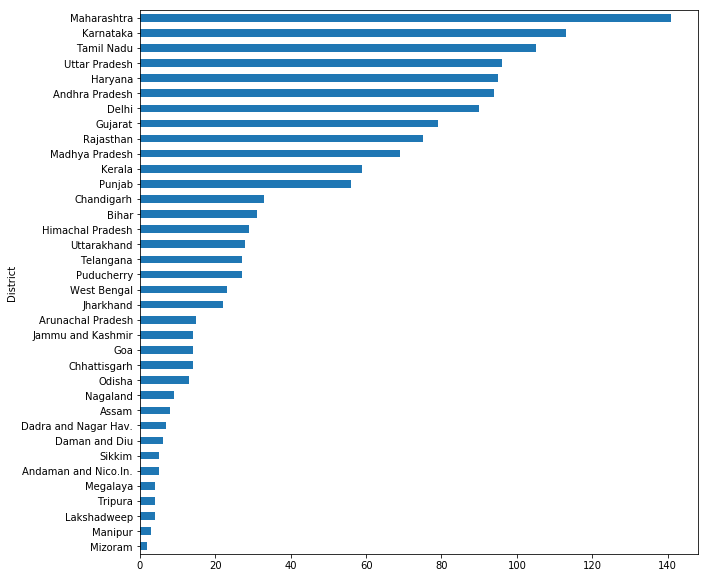

In [136]:
dist_plant_count = data.groupby(['District'])['Plant'].nunique().sort_values(ascending=True)
dist_plant_count.plot('barh',figsize=(10,10))


In [112]:
data['Total Value'] = data['Total Value'].fillna(0)

In [121]:
for state in data.District.unique():
    print('State - ',state)
    print(data[data['District']==state].groupby(['Plant'])['Total Value'].sum().sort_values(ascending=False)[:10])
    print('---')

State -  Maharashtra
Plant
BC03    9.827026e+07
BC01    4.605975e+07
BC26    3.766640e+07
BC02    3.100069e+07
BC19    2.268466e+07
BC24    2.040675e+07
BC25    1.933592e+07
BC34    1.918899e+07
BC11    1.488731e+07
X006    1.349296e+07
Name: Total Value, dtype: float64
---
State -  Madhya Pradesh
Plant
X060    3389256.78
X092     705061.22
X114     261964.48
BC26     105125.97
BC03      55502.31
X127      53020.01
BC02      47966.11
X037      30841.10
BC23      24913.09
BC05      22675.58
Name: Total Value, dtype: float64
---
State -  Karnataka
Plant
BC15    37846043.23
BC31    23474154.24
X007     5631585.16
X033     4339432.41
X062     2724283.83
X057     1502639.18
X102      719234.38
BC06      669643.10
BC05      411970.09
BC18      314164.75
Name: Total Value, dtype: float64
---
State -  Andhra Pradesh
Plant
BC05    60310490.27
BC17    37063262.33
BC04    26872615.93
BC12    19206012.74
X054     5993598.78
X037     2355142.43
BC06      545998.62
X063      502871.75
X068      4733

In [122]:
for state in data.District.unique():
    print('State - ',state)
    print(data[data['District']==state].groupby(['Plant'])['Total Value'].mean().sort_values(ascending=False)[:10])
    print('---')

State -  Maharashtra
Plant
BC21    24108.403333
BC18    21232.155000
BC06    16677.554000
BC13    14042.703333
BC29    13743.391667
BC16    13401.467273
BC12    11012.479000
BC08     7747.526342
X039     5859.416667
X001     5827.065011
Name: Total Value, dtype: float64
---
State -  Madhya Pradesh
Plant
X037    15420.550000
X013    14651.590000
BC05    11337.790000
BC27     6996.520000
BC11     6498.905000
BC13     6013.276667
BC02     4796.611000
BC30     3333.905000
BC26     2695.537692
X063     2029.650000
Name: Total Value, dtype: float64
---
State -  Karnataka
Plant
BC02    36999.850000
BC18    28560.431818
X039    24242.356000
BC32    16986.770000
X022    16538.043333
BC29    13947.740000
BC11    12352.293333
X024    11364.307500
BC05    11134.326757
X048    10372.918000
Name: Total Value, dtype: float64
---
State -  Andhra Pradesh
Plant
X011    20117.905000
BC31    11555.503478
BC26    10944.071429
BC02    10166.073333
BC16     9941.449000
BC06     8806.429355
BC01     8619.1809

In [123]:
for state in data.District.unique():
    print('State - ',state)
    print(data[data['District']==state].groupby(['Plant'])['Plant'].count().sort_values(ascending=False)[:10])
    print('---')

State -  Maharashtra
Plant
BC03    28514
BC26    13177
BC01    12103
BC02     8178
BC34     7428
X006     6461
BC24     5828
BC19     5766
BC25     5094
X034     3431
Name: Plant, dtype: int64
---
State -  Madhya Pradesh
Plant
X125    2115
X060    1990
X127    1864
X156    1556
X114    1187
X091     938
X118     766
X106     725
X092     646
X219     565
Name: Plant, dtype: int64
---
State -  Karnataka
Plant
BC15    8165
BC31    6568
X102    4004
X007    3687
X062    3573
X033    3245
X003    3232
X079    2087
X113    1893
X057    1846
Name: Plant, dtype: int64
---
State -  Andhra Pradesh
Plant
BC05    12267
BC17     8497
BC12     5182
BC04     4629
X054     2445
X204     1496
X063     1457
X037     1133
X056      824
X068      749
Name: Plant, dtype: int64
---
State -  Telangana
Plant
X082    2151
X175    1922
BC12    1362
BC05     879
X386     700
X174     394
X037     129
X083     102
X054      25
X063      18
Name: Plant, dtype: int64
---
State -  Tripura
Plant
X109    2
X036    1


In [137]:
data['Pin code'].isnull().sum()

0

In [138]:
data['Pin code'].nunique()

11810

In [140]:
data['Insurance Company'].isnull().sum()/data.shape[0]*100

95.2081395207124